Nama: Deryl Baharudin Sopandi

Sumber: https://www.kaggle.com/fayhosseini/brazilian-e-commerce-eda-for-beginners

# 1. Data Understanding

Dataset yang digunakan pada pretest ini dari Kaggle yaitu Dataset E-Commerce Publik Brazil yang dimiliki oleh Olist Store. Olist Store adalah Toko terbesar dari semua Marketplace Brazil.

Terdapat 8 dataset yang ada pada Sistem Database Olist Store, antara lain:
1. olist_customers_dataset.csv
2. olist_geolocation_dataset.csv
3. olist_orders_dataset.csv
4. olist_order_items_dataset.csv
5. olist_order_payments_dataset.csv
6. olist_order_reviews_dataset.csv
7. olist_products_dataset.csv
8. olist_sellers_dataset.csv
9. product_category_name_translation.csv

## 1.1. Import Libraries
Import Library pandas untuk 
Import Library numpy untuk
Import Library matplotlib untuk
Import Library seaborn untuk
Import datetime untuk
Import calendar untuk
Import CategoricalDtype untuk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import calendar
from pandas.api.types import CategoricalDtype

## 1.2. Load file CSV
Load data dari file csv ke dalam format data frame
customers untuk df dari olist_customers_dataset.csv
items untuk df dari olist_order_items_dataset.csv
payments untuk df dari order_payments_dataset.csv
orders untuk df dari orders_dataset.csv
products untuk df dari products_dataset.csv
category_translation untuk df dari product_category_name_translation.csv

In [2]:
customers = pd.read_csv(r"C:\Users\Lenovo\Documents\Dibimbing.id\Pretest\file\olist_customers_dataset.csv")
items = pd.read_csv(r"C:\Users\Lenovo\Documents\Dibimbing.id\Pretest\file\olist_order_items_dataset.csv")
payments = pd.read_csv(r"C:\Users\Lenovo\Documents\Dibimbing.id\Pretest\file\olist_order_payments_dataset.csv")
orders = pd.read_csv(r"C:\Users\Lenovo\Documents\Dibimbing.id\Pretest\file\olist_orders_dataset.csv")
products = pd.read_csv(r"C:\Users\Lenovo\Documents\Dibimbing.id\Pretest\file\olist_products_dataset.csv")
category_translation = pd.read_csv(r"C:\Users\Lenovo\Documents\Dibimbing.id\Pretest\file\product_category_name_translation.csv")

## 1.3. Pertanyaan Bisnis
Strategi Promosi yang dilakukan Olist Store sehingga lebih banyak orang melakukan transaksi, ini dapat dijawab dengan melakukan pengolahan data terkait:
1. Hari dalam satu minggu dimana customers brazil menggunakan online shopping. Sehingga dapat diketahui kapan promo paling optimal di release.
2. Produk apa yang di promosikan.

# 2. Data Preprocessing

## 2.1. Data Cleaning
Membuat Data Frame berisi informasi mengenai informasi null value/missing value dari setiap kolom untuk setiap dataset. Menghapus baris data yang memiliki nilai null value/missing value pada setiap kolom.

In [3]:
datasets = [customers, items, payments, orders, products, category_translation]
titles = ["customers", "items", "payments", "orders", "products", "category_translation"]

#To gather practical information about all datasets 
info_df = pd.DataFrame({},)
info_df['dataset']= titles
info_df['cols'] = [', '.join([col for col, null in df.isnull().sum().items() ]) for df in datasets]
info_df['cols_no']= [df.shape[1] for df in datasets]
info_df['null_no']= [df.isnull().sum().sum() for df in datasets]
info_df['null_cols_no']= [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
info_df['null_cols'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]


info_df.style.background_gradient(cmap='coolwarm')

,dataset,cols,cols_no,null_no,null_cols_no,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",5,0,0,
1,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",7,0,0,
2,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",5,0,0,
3,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
4,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
5,category_translation,"product_category_name, product_category_name_english",2,0,0,


## 2.2. File Merging
Merging File dari skema data sebagai berikut:
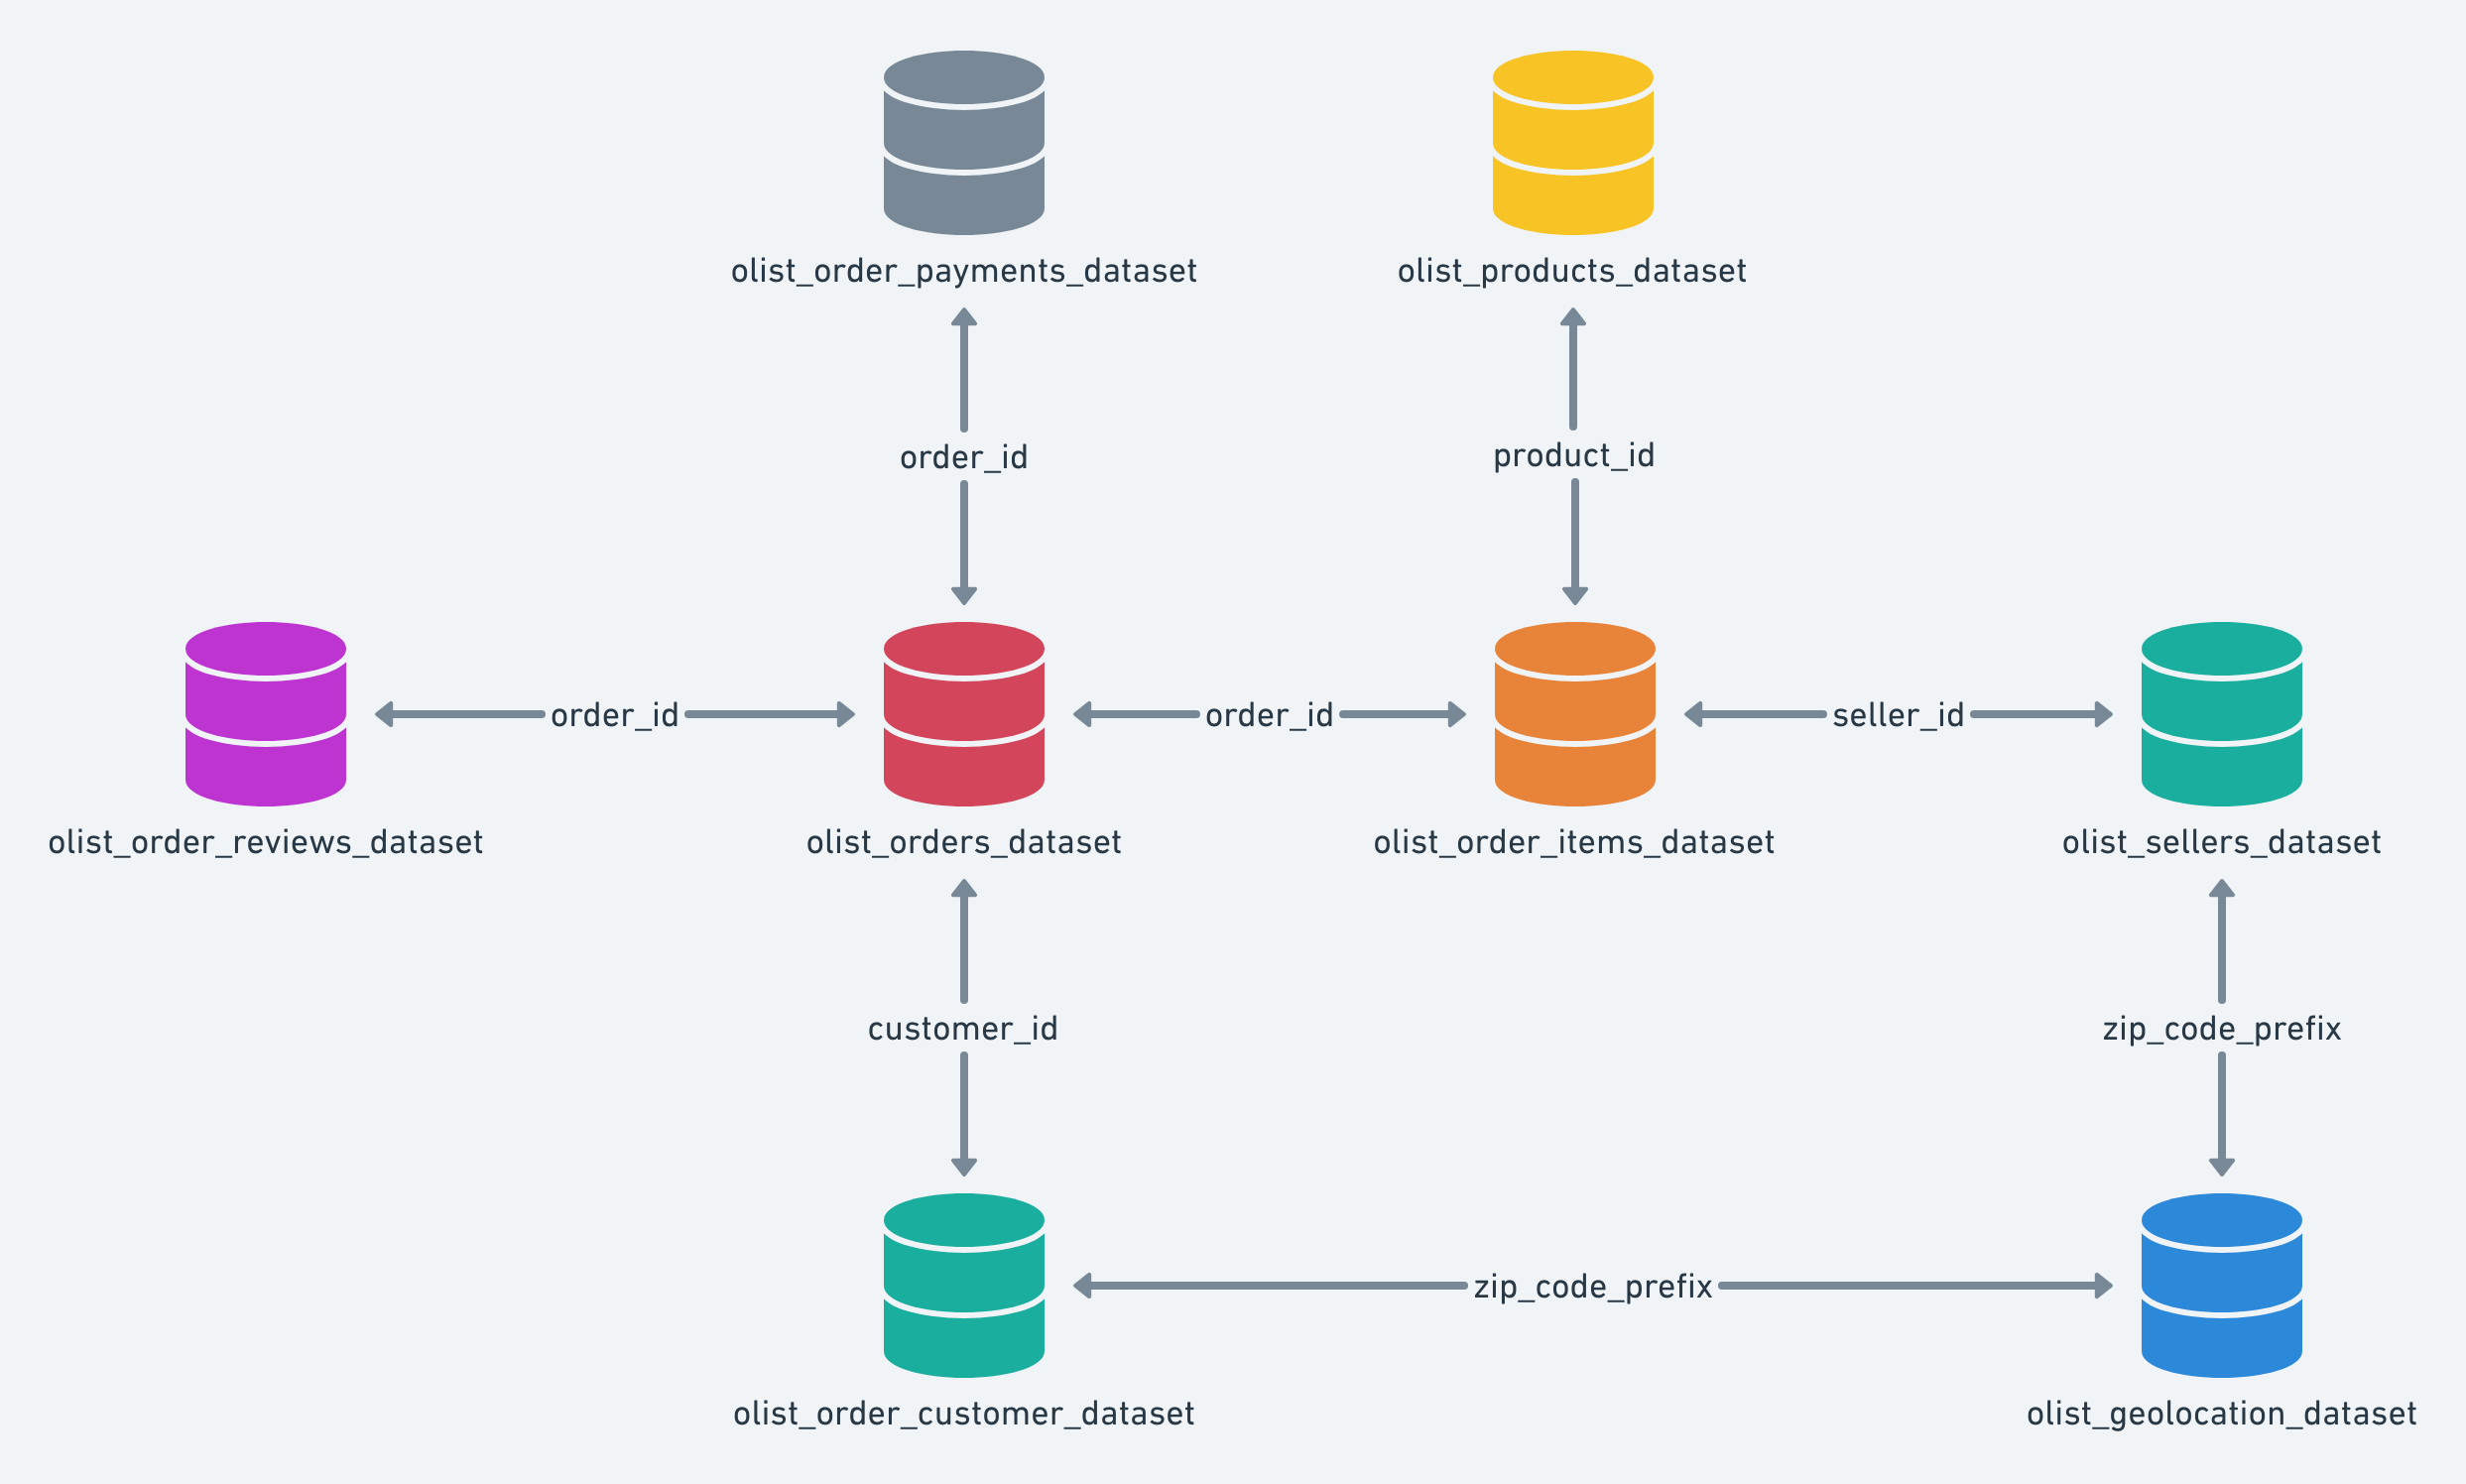

In [4]:
df = pd.merge(orders,payments, on="order_id")
df = df.merge(customers, on="customer_id")
df = df.merge(items, on="order_id")
df = df.merge(products, on="product_id")
df = df.merge(category_translation, on="product_category_name")

df.dropna(inplace=True)  #Keep the DataFrame with valid entries in the same variable

df.info()
df.isnull().sum().sort_values()  # To get the number of missing value in each row if there is still any. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113367 entries, 0 to 115877
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113367 non-null  object 
 1   customer_id                    113367 non-null  object 
 2   order_status                   113367 non-null  object 
 3   order_purchase_timestamp       113367 non-null  object 
 4   order_approved_at              113367 non-null  object 
 5   order_delivered_carrier_date   113367 non-null  object 
 6   order_delivered_customer_date  113367 non-null  object 
 7   order_estimated_delivery_date  113367 non-null  object 
 8   payment_sequential             113367 non-null  int64  
 9   payment_type                   113367 non-null  object 
 10  payment_installments           113367 non-null  int64  
 11  payment_value                  113367 non-null  float64
 12  customer_unique_id            

order_id                         0
product_height_cm                0
product_length_cm                0
product_weight_g                 0
product_photos_qty               0
product_description_lenght       0
product_name_lenght              0
product_category_name            0
freight_value                    0
price                            0
shipping_limit_date              0
seller_id                        0
product_id                       0
order_item_id                    0
product_width_cm                 0
customer_state                   0
customer_zip_code_prefix         0
customer_unique_id               0
payment_value                    0
payment_installments             0
payment_type                     0
payment_sequential               0
order_estimated_delivery_date    0
order_delivered_customer_date    0
order_delivered_carrier_date     0
order_approved_at                0
order_purchase_timestamp         0
order_status                     0
customer_id         

In [5]:
df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
77064,e0d821e9ff2e0fc0823d159792d9a2e6,1de444c2c8dfd4df7003d1d4b446ef94,delivered,2018-05-21 22:50:48,2018-05-22 02:15:41,2018-05-22 09:22:00,2018-06-21 15:46:16,2018-06-07 00:00:00,1,credit_card,...,15.23,eletronicos,40.0,669.0,2.0,250.0,20.0,10.0,16.0,electronics
75806,ff6ab7a209609f6d415e5465e903bbe0,5cca92fc0d4ae1f2d79442783441091f,delivered,2017-10-31 10:49:23,2017-10-31 11:06:19,2017-11-03 12:51:54,2017-11-06 22:09:32,2017-11-08 00:00:00,1,credit_card,...,7.78,eletronicos,47.0,485.0,1.0,200.0,30.0,10.0,20.0,electronics
81042,6385ebcfa2297036d3b9bc88f2275545,3232dbd5530719db114e87854dda28b0,delivered,2018-02-06 21:16:36,2018-02-06 21:30:22,2018-02-07 18:18:29,2018-02-19 22:16:52,2018-03-07 00:00:00,1,credit_card,...,17.26,cool_stuff,54.0,629.0,1.0,1050.0,36.0,24.0,22.0,cool_stuff
103911,edf914c62e2abd7b4859327aac9a7727,1503f463072a6c3255885713f173bf9d,delivered,2018-07-26 08:43:49,2018-07-26 08:55:23,2018-07-26 13:08:00,2018-07-27 18:24:40,2018-08-03 00:00:00,1,credit_card,...,7.67,fashion_bolsas_e_acessorios,54.0,151.0,3.0,250.0,16.0,2.0,20.0,fashion_bags_accessories
61127,37c2d70dad88a5791ea06e598e43902e,1672895e6d245b6277856c4dd25f34f8,delivered,2017-06-16 13:18:05,2017-06-16 13:30:15,2017-06-19 13:43:56,2017-06-22 15:53:55,2017-07-06 00:00:00,1,credit_card,...,11.85,telefonia,59.0,409.0,1.0,225.0,18.0,4.0,12.0,telephony
36771,94c6db2dce626f40e64942d830d8f086,c60ebbc61c0e20d5df4a49b5034a8a71,delivered,2018-01-16 21:17:55,2018-01-17 21:11:28,2018-01-19 01:51:17,2018-01-19 16:04:47,2018-01-31 00:00:00,1,credit_card,...,7.78,informatica_acessorios,52.0,210.0,1.0,200.0,33.0,4.0,27.0,computers_accessories
12219,e61fcab8b96de0335adf7fd562ebb869,75e24b01d5409e9dad63427695e0ed0d,delivered,2018-06-13 09:39:17,2018-06-13 09:56:57,2018-06-21 09:02:00,2018-06-28 19:51:31,2018-07-05 00:00:00,1,credit_card,...,18.75,automotivo,56.0,568.0,4.0,1800.0,52.0,5.0,52.0,auto
64957,1634d04100d187e0f985f2eb2909cba1,1a3776751ed3dcf149859b769566fe0c,delivered,2017-11-11 12:47:01,2017-11-11 12:55:51,2017-11-16 21:54:42,2017-11-21 21:48:56,2017-12-05 00:00:00,1,credit_card,...,15.39,beleza_saude,59.0,492.0,3.0,250.0,22.0,10.0,18.0,health_beauty
96187,950d73734673943202a34946bb62db32,1ac612d46ac895dbe3666d3116b90a19,delivered,2017-12-14 10:37:19,2017-12-14 10:46:22,2017-12-14 18:53:15,2017-12-28 21:29:04,2018-01-10 00:00:00,1,credit_card,...,16.98,esporte_lazer,52.0,822.0,1.0,2400.0,21.0,21.0,21.0,sports_leisure
84932,26e3ef9735227d94c5e14a0a461d0ab5,ee0d30f65ed72f4041f9a5ced21e762f,delivered,2018-05-11 03:40:43,2018-05-11 03:50:36,2018-05-11 11:43:00,2018-05-17 16:12:25,2018-05-30 00:00:00,1,credit_card,...,8.26,relogios_presentes,58.0,737.0,3.0,350.0,16.0,2.0,20.0,watches_gifts


# 3. Exploratory Data Analysis & Modelling

## 3.1. Hari paling banyak transaksi

Text(0.5, 1.0, 'Years')

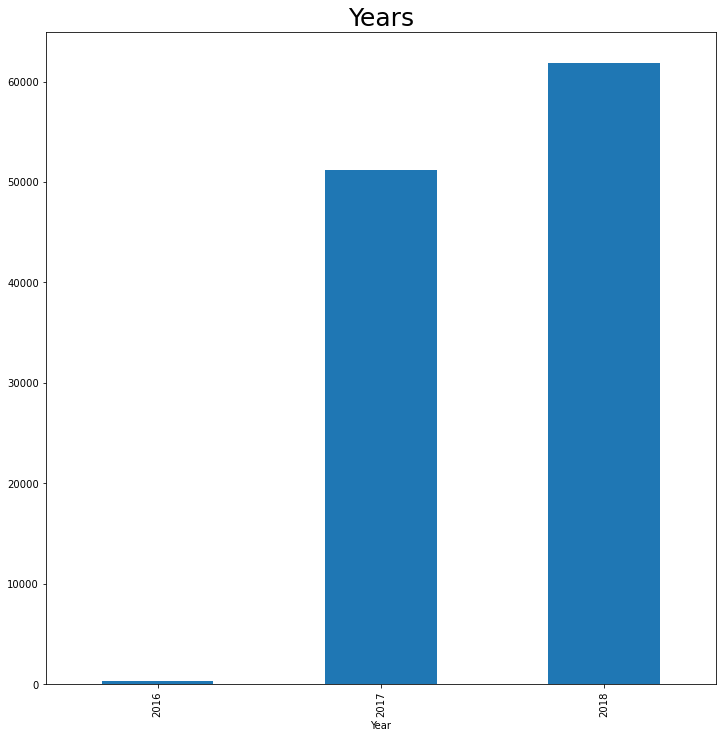

In [6]:
#'order_purchase_timestamp' and 'order_delivered_customer_date' are object 
df[['order_purchase_timestamp', 'order_delivered_customer_date']]=df[['order_purchase_timestamp', 'order_delivered_customer_date']].apply(pd.to_datetime)

# To extract "year" from date. 
df['Year'] = df['order_purchase_timestamp'].dt.year
df.groupby('Year').size().plot(
    kind = 'bar',
    figsize=(12,12),  
)
plt.title('Years',fontsize=25)

Transaksi pada olist store semakin banyak seiring berjalan nya waktu

Text(0.5, 1.0, 'Years')

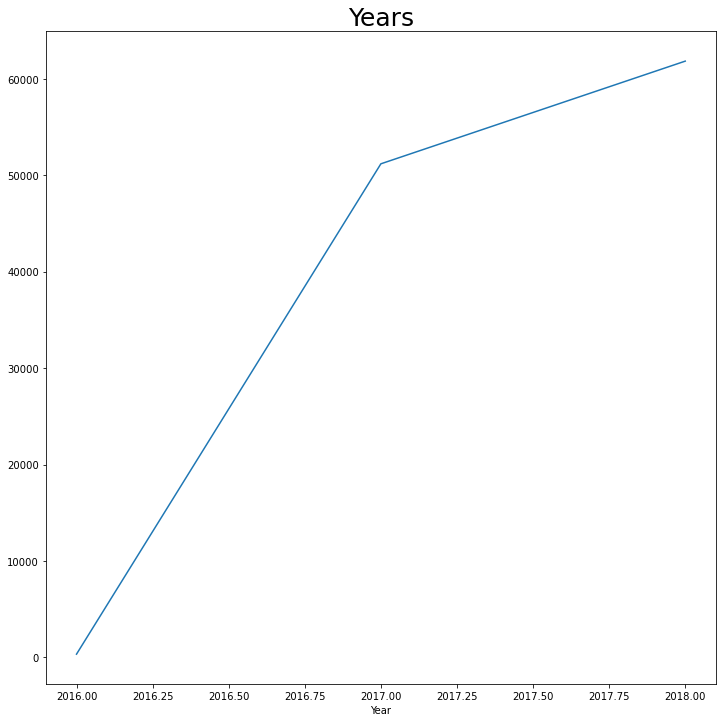

In [7]:
df['Year'] = df['order_purchase_timestamp'].dt.year
df.groupby('Year').size().plot(
    kind = 'line',
    figsize=(12,12)
)
plt.title('Years',fontsize=25)

Pada periode 2016 sampai 2017 Olist store mengalami perkembangan yang sangat pesat. Pada periode 2017 sampai 2018 terjadi perkembangan secara gradual.

In [8]:
df['Year']  # Check column 'Year' values to check it be right.

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
115873    2018
115874    2018
115875    2018
115876    2017
115877    2017
Name: Year, Length: 113367, dtype: int64

Jika kita lihat pada pembelanjaan per bulan

Text(0.5, 1.0, 'Months')

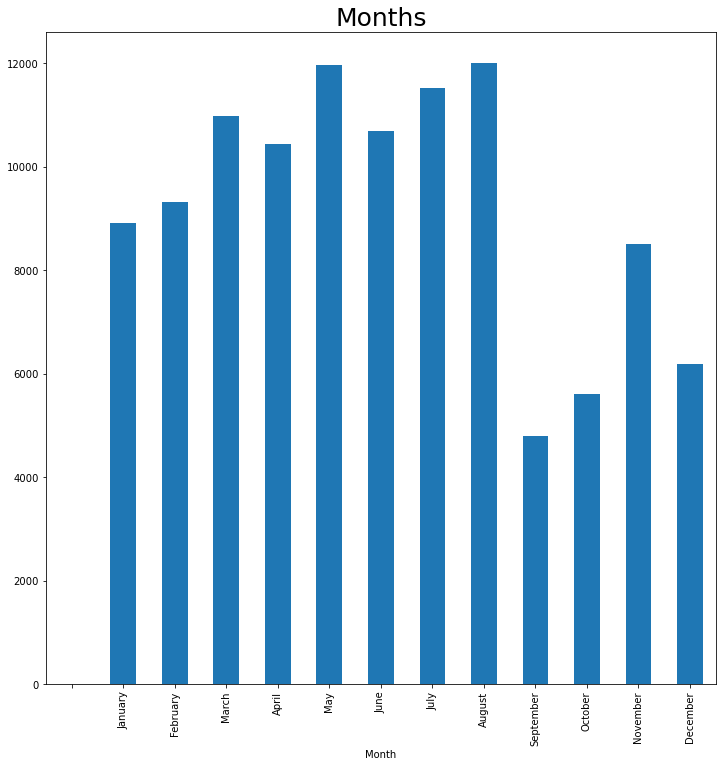

In [9]:
df['Month'] =  pd.Series(pd.Categorical(df['order_purchase_timestamp'].dt.month_name(), categories=list(calendar.month_name)))
df['Month']
df.groupby('Month').size().plot(
    kind = 'bar',
    figsize=(12,12)
)
plt.title('Months',fontsize=25)

Text(0.5, 1.0, 'Months')

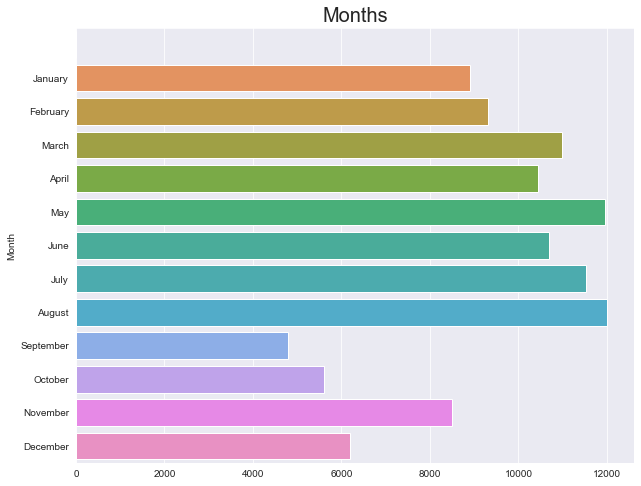

In [10]:
month = df.groupby('Month').size().sort_values()
fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=month.index, x=month.values)
plt.title('Months',fontsize=20)

Transaksi terbanyak pada bulan Mei dan Agustus dimana secara keseluruhan transaksi terbanyak terdapat pada range bulan Maret sampai Agustus.
Untuk selanjutnya, kita akan satukan bulan dan tahun untuk menganalisa transaksi berdasarkan hari dalam 1 minggu.

In [11]:
df['MonthY'] = df['order_purchase_timestamp'].dt.strftime('%b%Y')
df['MonthY']

0         Oct2017
1         Oct2017
2         Oct2017
3         Aug2017
4         Aug2017
           ...   
115873    Aug2018
115874    Jul2018
115875    Jul2018
115876    Jan2017
115877    Sep2017
Name: MonthY, Length: 113367, dtype: object

<AxesSubplot:xlabel='MonthY'>

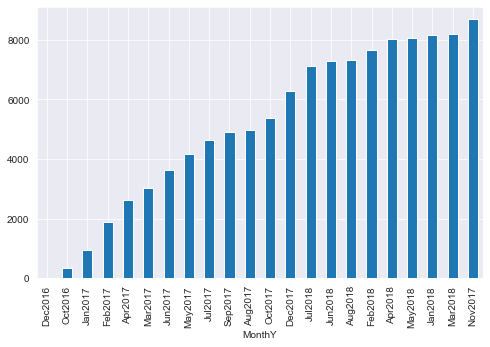

In [12]:
df.groupby('MonthY').size().sort_values().plot(
    kind = 'bar',
    figsize=(8,5)
)

Text(0.5, 1.0, 'Month_Year')

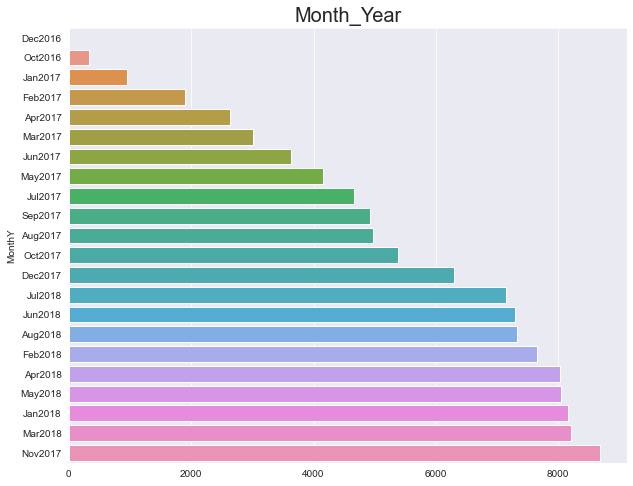

In [13]:
Month_Year = df.groupby('MonthY').size().sort_values()

fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=Month_Year.index, x=Month_Year.values)
plt.title('Month_Year',fontsize=20)

Kita akan melakukan analisa pada hari apakah dalam satu minggu dimana orang-orang brazil menghabiskan waktu lebih banyak untuk melakukan pembelanjaan online sehingga membantu para penjual pada Olist Store mengenai kapan waktu optimal untuk melakukan release promosi produk mereka.

<AxesSubplot:xlabel='Day'>

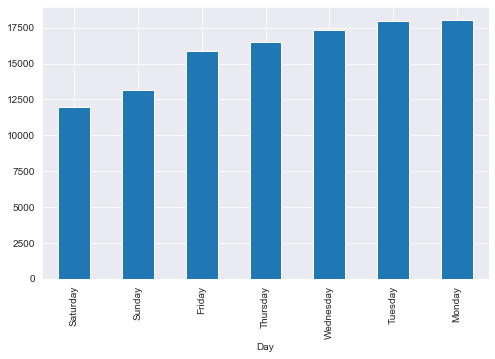

In [14]:
df['Day'] = pd.Series(pd.Categorical(df['order_purchase_timestamp'].dt.day_name(), categories=list(calendar.day_name)))
df.groupby('Day').size().sort_values().plot(
    kind = 'bar',
    figsize=(8,5)
)

Text(0.5, 1.0, 'Days')

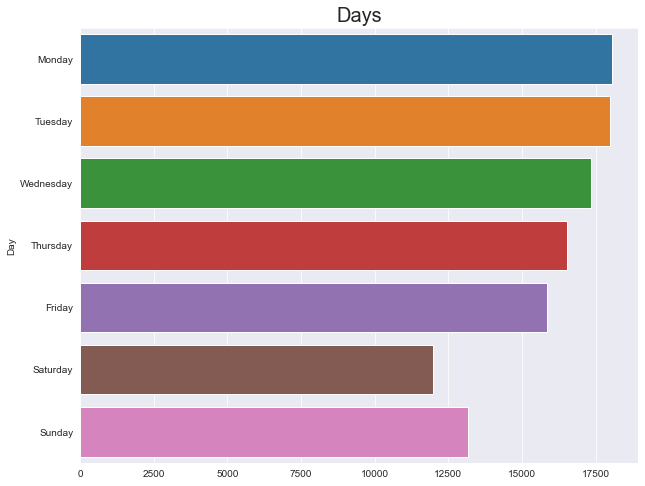

In [15]:
 day = df.groupby('Day').size().sort_values()

 fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=day.index, x=day.values)
plt.title('Days',fontsize=20)

Jika kita lihat, hari senin dan selasa merupakan waktu terbanyak orang brazil melakukan transaksi, Transaksi semakin berkurang pada hari hari setelahnya kemudian mengalami penambahan pada hari minggu.
Dari data tersebut, penjual lebih baik untuk melakukan release promosi di hari sabtu dimana periode berakhirnya promosi pada hari selasa.

## 3.2. Produk Paling Laris

Text(0.5, 1.0, 'Top 10 product category')

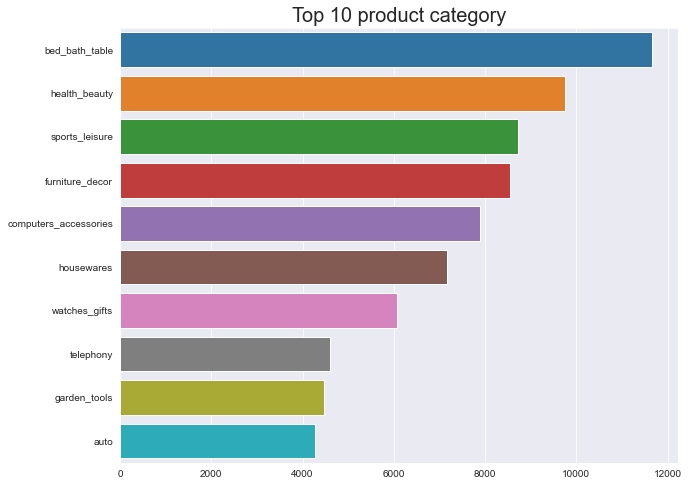

In [16]:
top_10_category = df["product_category_name_english"].value_counts().sort_values(ascending=False)[:10]

fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=top_10_category.index, x=top_10_category.values)
plt.title('Top 10 product category',fontsize=20)

In [17]:
top_10_category

bed_bath_table           11649
health_beauty             9761
sports_leisure            8731
furniture_decor           8553
computers_accessories     7897
housewares                7172
watches_gifts             6063
telephony                 4601
garden_tools              4463
auto                      4283
Name: product_category_name_english, dtype: int64

Produk paling banyak dibeli pada Olist Store adalah Produk-produk pada kategori Bed Bath Table, Health Beauty, dan Sport Leisure. Kemudian dilanjutkan dengan kategori lainya sesuai yang dijelaskan informasi diatas.

# 4. Insight & Recommendation

1. Orang-orang Brazil lebih banyak menghabiskan waktu mereka untuk belanja online pada hari senin dan selasa sehingga waktu terbaik penjual untuk release promosi adalah dari hari sabtu dengan periode promosi sampai hari selasa sehingga promosi tersebut lebih banyak dilihat oleh orang-orang brazil.
2. Customer Olist store lebih banyak melakukan transaksi pada keperluan rumah tangga seperti bed bath table, health beauty, sport leisure, furniture, computer, dll. Sehingga untuk iklan Olist Store lebih menunjukan produk-produk tersebut untuk dapat lebih dilihat oleh masyarakat brazil.